<a href="https://colab.research.google.com/github/seismosmsr/hawaii_soils/blob/main/Hawaii_Soils_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")
install.packages("terra")
install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [3]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(terra)
library(randomForest)
library(parallel)

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: sp

terra 1.7.55


Attaching package: ‘terra’


The following object is masked from ‘package:data.table’:

    shift


The following objects are masked from ‘package:magrittr’:

    extract, inset


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [78]:
while(TRUE){}

In [6]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=deb0c89bede5d21c7b2a2f871170a758&access_type=offline&prompt=consent



In [5]:
# https://drive.google.com/file/d/1ryTzWz0t9mgI5ynPvMzM21D135dLJvWv/view?usp=drive_link
# Updated: https://drive.google.com/file/d/17c3DJcujQ_0MHirG2z2lSU88A0lvjo1C/view?usp=sharing
drive_download(as_id('17c3DJcujQ_0MHirG2z2lSU88A0lvjo1C'), path = paste0('/content/fia.csv'), overwrite = TRUE)
fia_dt <-  st_read('/content/fia.csv') %>% st_as_sf(coords = c("LON","LAT"), crs = 4326) %>% data.table

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=d29e76ed4a6b8d9ea3f51940fcfe7804&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbTF1bnl6QU40QVp4dG1KaEJqMW9BbUJmM1Ztdm9LUjZLVEJCVUFBRkRyTDFtOG5xQjUxTk1RRS1nNnVxME9zQSIsInN0YXRlIjoiZDI5ZTc2ZWQ0YTZiOGQ5ZWEzZjUxOTQwZmNmZTc4MDQifQ==


File downloaded:

• 2023_11_01FIA_soil_subset.csv <id: 17c3DJcujQ_0MHirG2z2lSU88A0lvjo1C>

Saved locally as:

• /content/fia.csv



Reading layer `fia' from data source `/content/fia.csv' using driver `CSV'


Warning message:
“no simple feature geometries present: returning a data.frame or tbl_df”


In [82]:
# fia_dt %>% st_as_sf %>% st_write('fia.gpkg')

In [7]:
# https://drive.google.com/file/d/1G-qBpO_nzLIHWZQGNyrSutmBonjsrvEJ/view?usp=drive_link
drive_download(as_id('1G-qBpO_nzLIHWZQGNyrSutmBonjsrvEJ'), path = "/content/250_summary_grid_dt.gpkg", overwrite = TRUE)
grid_dt <- st_read("/content/250_summary_grid_dt.gpkg") %>% st_transform(4326) %>% data.table()

File downloaded:

• 250_summary_grid_full_dt.gpkg <id: 1G-qBpO_nzLIHWZQGNyrSutmBonjsrvEJ>

Saved locally as:

• /content/250_summary_grid_dt.gpkg



Reading layer `250_summary_grid_full_dt' from data source 
  `/content/250_summary_grid_dt.gpkg' using driver `GPKG'
Simple feature collection with 227561 features and 35 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 57161.36 ymin: 16952.32 xmax: 572661.4 ymax: 381202.3
Projected CRS: NAD_1983_HARN_StatePlane_Hawaii_1_FIPS_5101


In [8]:
print('hello')

[1] "hello"


In [8]:
# Simulation data
# https://drive.google.com/file/d/1qhDmKW0ufjDraEaJ7vXDYUmHeqPnhmND/view?usp=drive_link
drive_download(file = as_id('1qhDmKW0ufjDraEaJ7vXDYUmHeqPnhmND'), path =  '/content/sim_results_Hawaii_Run1.gpkg', overwrite = TRUE)

# # # https://drive.google.com/file/d/1ShQ40eYKzUx-geZfm4lTz_YezZRG9qGe/view?usp=drive_link Run 2
drive_download(file = as_id('1ShQ40eYKzUx-geZfm4lTz_YezZRG9qGe'), path =  '/content/sim_results_Hawaii_Run2.gpkg', overwrite = TRUE)

# # # https://drive.google.com/file/d/1Zr13S1PI2Z782At36qZcCPokYpSCjZNW/view?usp=drive_link Run 3
drive_download(file = as_id('1Zr13S1PI2Z782At36qZcCPokYpSCjZNW'), path =  '/content/sim_results_Hawaii_Run3.gpkg', overwrite = TRUE)


File downloaded:

• sim_results_Hawaii_10000m_v3_Run1.gpkg
  <id: 1qhDmKW0ufjDraEaJ7vXDYUmHeqPnhmND>

Saved locally as:

• /content/sim_results_Hawaii_Run1.gpkg

File downloaded:

• sim_results_Hawaii_10000m_v3_Run2.gpkg
  <id: 1ShQ40eYKzUx-geZfm4lTz_YezZRG9qGe>

Saved locally as:

• /content/sim_results_Hawaii_Run2.gpkg

File downloaded:

• sim_results_Hawaii_10000m_v3_Run3.gpkg
  <id: 1Zr13S1PI2Z782At36qZcCPokYpSCjZNW>

Saved locally as:

• /content/sim_results_Hawaii_Run3.gpkg



In [300]:
sim_dt <- NULL
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,48002501,2563.7,150306502,8027.3,150306502,8027.3
Vcells,1603080720,12230.6,4066889840,31028.0,4066889840,31028.0


In [9]:
sim_1_dt <- st_read( '/content/sim_results_Hawaii_Run1.gpkg') %>% data.table
sim_2_dt <- st_read( '/content/sim_results_Hawaii_Run2.gpkg') %>% data.table
sim_3_dt <- st_read( '/content/sim_results_Hawaii_Run3.gpkg') %>% data.table

Reading layer `sim_results_Hawaii_10000m_v3_Run1' from data source 
  `/content/sim_results_Hawaii_Run1.gpkg' using driver `GPKG'
Simple feature collection with 3410000 features and 79 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -156.0017 ymin: 19.0045 xmax: -154.8362 ymax: 20.25088
Geodetic CRS:  WGS 84
Reading layer `sim_results_Hawaii_10000m_v3_Run2' from data source 
  `/content/sim_results_Hawaii_Run2.gpkg' using driver `GPKG'
Simple feature collection with 3410000 features and 79 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -156.0017 ymin: 19.0045 xmax: -154.8362 ymax: 20.25088
Geodetic CRS:  WGS 84
Reading layer `sim_results_Hawaii_10000m_v3_Run3' from data source 
  `/content/sim_results_Hawaii_Run3.gpkg' using driver `GPKG'
Simple feature collection with 3410000 features and 79 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -156.0017 ymin: 19.0045 xmax: -154.8362 ymax: 20.25088
Geodetic CRS:  WGS 84


In [10]:
sim_dt <-list(sim_1_dt ,sim_2_dt,sim_3_dt) %>% rbindlist()

In [11]:
grid_int_dt  <- fia_dt$geom %>% st_transform(4135) %>% st_buffer(10000) %>% st_transform(4326) %>% st_intersects(grid_dt$geom)

In [12]:
rm_vec <- grid_int_dt %>% lapply(length) %>% unlist > 0
grid_int_dt <- grid_int_dt[rm_vec]
fia_dt <- fia_dt[rm_vec,]

In [13]:
grid_dt <- grid_dt[!is.na(srad),]

In [14]:
grid_dt$agbd_n <- grid_dt$agbd_n %>% as.numeric

In [15]:
fia_dt$Stock_SOC_Mg_Ha <- fia_dt$Stock_SOC_Mg_Ha %>% as.numeric

Warning message in fia_dt$Stock_SOC_Mg_Ha %>% as.numeric:
“NAs introduced by coercion”


In [41]:
names(sim_dt)[43]

[1] "predicted"

In [38]:
names(sim_dt)

[1] "PLOT"                       "SOC_Mg_Ha"                 
 [3] "county_name"                "DEPTH_UPPER"               
 [5] "DEPTH_LOWER"                "id"                        
 [7] "left"                       "top"                       
 [9] "right"                      "bottom"                    
[11] "water"                      "trees"                     
[13] "grass"                      "flooded_vegetation"        
[15] "crops"                      "shrub_and_scrub"           
[17] "built"                      "bare"                      
[19] "snow_and_ice"               "elevation"                 
[21] "landform"                   "SRTM_mTPI"                 
[23] "aet"                        "def"                       
[25] "pdsi"                       "pet"                       
[27] "pr"                         "ro"                        
[29] "soil"                       "srad"                      
[31] "swe"                        "tmmn"                      
[33] "tmmx"                       "vap"                       
[35] "vpd"                        "vs"                        
[37] "agbd_m"                     "agbd_sd"                   
[39] "agbd_n"                     "majorcomposition"          
[41] "age_years"                  "age_class"                 
[43] "predicted"                  "var_imp_DEPTH_UPPER"       
[45] "var_imp_DEPTH_LOWER"        "var_imp_water"             
[47] "var_imp_trees"              "var_imp_grass"             
[49] "var_imp_flooded_vegetation" "var_imp_crops"             
[51] "var_imp_shrub_and_scrub"    "var_imp_built"             
[53] "var_imp_bare"               "var_imp_snow_and_ice"      
[55] "var_imp_elevation"          "var_imp_landform"          
[57] "var_imp_SRTM_mTPI"          "var_imp_aet"               
[59] "var_imp_def"                "var_imp_pdsi"              
[61] "var_imp_pet"                "var_imp_pr"                
[63] "var_imp_ro"                 "var_imp_soil"              
[65] "var_imp_srad"               "var_imp_swe"               
[67] "var_imp_tmmn"               "var_imp_tmmx"              
[69] "var_imp_vap"                "var_imp_vpd"               
[71] "var_imp_vs"                 "var_imp_agbd_m"            
[73] "var_imp_agbd_sd"            "var_imp_agbd_n"            
[75] "var_imp_majorcomposition"   "var_imp_age_years"         
[77] "var_imp_age_class"          "r2"                        
[79] "sim_id"                     "geom"

In [40]:
names(sim_no_depth_dt)[-c(2,4,5,43,78,80)]

[1] "PLOT"                       "id"                        
 [3] "right"                      "bottom"                    
 [5] "water"                      "trees"                     
 [7] "grass"                      "flooded_vegetation"        
 [9] "crops"                      "shrub_and_scrub"           
[11] "built"                      "bare"                      
[13] "snow_and_ice"               "elevation"                 
[15] "landform"                   "SRTM_mTPI"                 
[17] "aet"                        "def"                       
[19] "pdsi"                       "pet"                       
[21] "pr"                         "ro"                        
[23] "soil"                       "srad"                      
[25] "swe"                        "tmmn"                      
[27] "tmmx"                       "vap"                       
[29] "vpd"                        "vs"                        
[31] "agbd_m"                     "agbd_sd"                   
[33] "agbd_n"                     "majorcomposition"          
[35] "age_years"                  "age_class"                 
[37] "var_imp_DEPTH_UPPER"        "var_imp_DEPTH_LOWER"       
[39] "var_imp_water"              "var_imp_grass"             
[41] "var_imp_flooded_vegetation" "var_imp_crops"             
[43] "var_imp_shrub_and_scrub"    "var_imp_built"             
[45] "var_imp_bare"               "var_imp_snow_and_ice"      
[47] "var_imp_elevation"          "var_imp_landform"          
[49] "var_imp_SRTM_mTPI"          "var_imp_aet"               
[51] "var_imp_def"                "var_imp_pdsi"              
[53] "var_imp_pet"                "var_imp_pr"                
[55] "var_imp_ro"                 "var_imp_soil"              
[57] "var_imp_srad"               "var_imp_swe"               
[59] "var_imp_tmmn"               "var_imp_tmmx"              
[61] "var_imp_vap"                "var_imp_vpd"               
[63] "var_imp_vs"                 "var_imp_agbd_m"            
[65] "var_imp_agbd_sd"            "var_imp_agbd_n"            
[67] "var_imp_majorcomposition"   "var_imp_age_years"         
[69] "var_imp_age_class"          "sim_id"

In [16]:
sim_no_depth_dt <- sim_dt[,names(sim_dt)[-c(2,4,5,43,78,80)],with=FALSE] %>% unique

In [43]:
sim_c_no_depth_dt %>% nrow

[1] 3777465

In [47]:
sim_c_no_depth_dt <- sim_dt[,list(SOC_Mg_Ha=sum(SOC_Mg_Ha),predicted = sum(predicted),geom = unique(geom)),by = .(PLOT,sim_id)]
# sim_c_no_depth_dt <- sim_c_no_depth_dt %>% unique()

In [26]:
(sim_no_depth_dt$PLOT %in% sim_c_no_depth_dt$PLOT & sim_no_depth_dt$sim_id %in% sim_c_no_depth_dt$sim_id ) %>% table

.
   TRUE 
3780000 

In [27]:
# sim_c_no_depth_dt

In [50]:
sim_c_sum_dt <- merge(sim_c_no_depth_dt,sim_no_depth_dt,match = c('PLOT','sim_dt'), allow.cartesian=TRUE)

In [52]:
sim_c_sum_dt %>% names

[1] "PLOT"                       "sim_id"                    
 [3] "SOC_Mg_Ha"                  "predicted"                 
 [5] "geom"                       "county_name"               
 [7] "id"                         "left"                      
 [9] "top"                        "right"                     
[11] "bottom"                     "water"                     
[13] "trees"                      "grass"                     
[15] "flooded_vegetation"         "crops"                     
[17] "shrub_and_scrub"            "built"                     
[19] "bare"                       "snow_and_ice"              
[21] "elevation"                  "landform"                  
[23] "SRTM_mTPI"                  "aet"                       
[25] "def"                        "pdsi"                      
[27] "pet"                        "pr"                        
[29] "ro"                         "soil"                      
[31] "srad"                       "swe"                       
[33] "tmmn"                       "tmmx"                      
[35] "vap"                        "vpd"                       
[37] "vs"                         "agbd_m"                    
[39] "agbd_sd"                    "agbd_n"                    
[41] "majorcomposition"           "age_years"                 
[43] "age_class"                  "var_imp_DEPTH_UPPER"       
[45] "var_imp_DEPTH_LOWER"        "var_imp_water"             
[47] "var_imp_trees"              "var_imp_grass"             
[49] "var_imp_flooded_vegetation" "var_imp_crops"             
[51] "var_imp_shrub_and_scrub"    "var_imp_built"             
[53] "var_imp_bare"               "var_imp_snow_and_ice"      
[55] "var_imp_elevation"          "var_imp_landform"          
[57] "var_imp_SRTM_mTPI"          "var_imp_aet"               
[59] "var_imp_def"                "var_imp_pdsi"              
[61] "var_imp_pet"                "var_imp_pr"                
[63] "var_imp_ro"                 "var_imp_soil"              
[65] "var_imp_srad"               "var_imp_swe"               
[67] "var_imp_tmmn"               "var_imp_tmmx"              
[69] "var_imp_vap"                "var_imp_vpd"               
[71] "var_imp_vs"                 "var_imp_agbd_m"            
[73] "var_imp_agbd_sd"            "var_imp_agbd_n"            
[75] "var_imp_majorcomposition"   "var_imp_age_years"         
[77] "var_imp_age_class"

In [53]:
sim_c_sum_dt[,z:=predicted-SOC_Mg_Ha]

In [55]:
sim_c_sum_dt[,rmse:=mean(((predicted-SOC_Mg_Ha))^2)]

In [56]:
sim_c_sum_dt[,rmse_p:=mean(((predicted-SOC_Mg_Ha)/SOC_Mg_Ha)^2)]

In [61]:
names(sim_c_sum_dt)

[1] "PLOT"                       "sim_id"                    
 [3] "county_name"                "id"                        
 [5] "left"                       "top"                       
 [7] "right"                      "bottom"                    
 [9] "water"                      "trees"                     
[11] "grass"                      "flooded_vegetation"        
[13] "crops"                      "shrub_and_scrub"           
[15] "built"                      "bare"                      
[17] "snow_and_ice"               "elevation"                 
[19] "landform"                   "SRTM_mTPI"                 
[21] "aet"                        "def"                       
[23] "pdsi"                       "pet"                       
[25] "pr"                         "ro"                        
[27] "soil"                       "srad"                      
[29] "swe"                        "tmmn"                      
[31] "tmmx"                       "vap"                       
[33] "vpd"                        "vs"                        
[35] "agbd_m"                     "agbd_sd"                   
[37] "agbd_n"                     "majorcomposition"          
[39] "age_years"                  "age_class"                 
[41] "var_imp_DEPTH_UPPER"        "var_imp_DEPTH_LOWER"       
[43] "var_imp_water"              "var_imp_trees"             
[45] "var_imp_grass"              "var_imp_flooded_vegetation"
[47] "var_imp_crops"              "var_imp_shrub_and_scrub"   
[49] "var_imp_built"              "var_imp_bare"              
[51] "var_imp_snow_and_ice"       "var_imp_elevation"         
[53] "var_imp_landform"           "var_imp_SRTM_mTPI"         
[55] "var_imp_aet"                "var_imp_def"               
[57] "var_imp_pdsi"               "var_imp_pet"               
[59] "var_imp_pr"                 "var_imp_ro"                
[61] "var_imp_soil"               "var_imp_srad"              
[63] "var_imp_swe"                "var_imp_tmmn"              
[65] "var_imp_tmmx"               "var_imp_vap"               
[67] "var_imp_vpd"                "var_imp_vs"                
[69] "var_imp_agbd_m"             "var_imp_agbd_sd"           
[71] "var_imp_agbd_n"             "var_imp_majorcomposition"  
[73] "var_imp_age_years"          "var_imp_age_class"         
[75] "SOC_Mg_Ha"                  "predicted"                 
[77] "geom"                       "z"

In [131]:
# sim_c_sum_dt[PLOT == 2159][,list(rmse = mean(sqrt(z^2)),var_imp_agbd_sd = mean(var_imp_agbd_sd),geom=unique(geom)),by = .(id,trees,shrub_and_scrub,built,bare,aet,soil,vs,SRTM_mTPI,agbd_m,agbd_sd)] %>%
#   ggplot(aes(x=var_imp_agbd_sd,y=rmse))+
#   geom_bin2d() +
#   geom_smooth(method='lm')

`geom_smooth()` using formula = 'y ~ x'


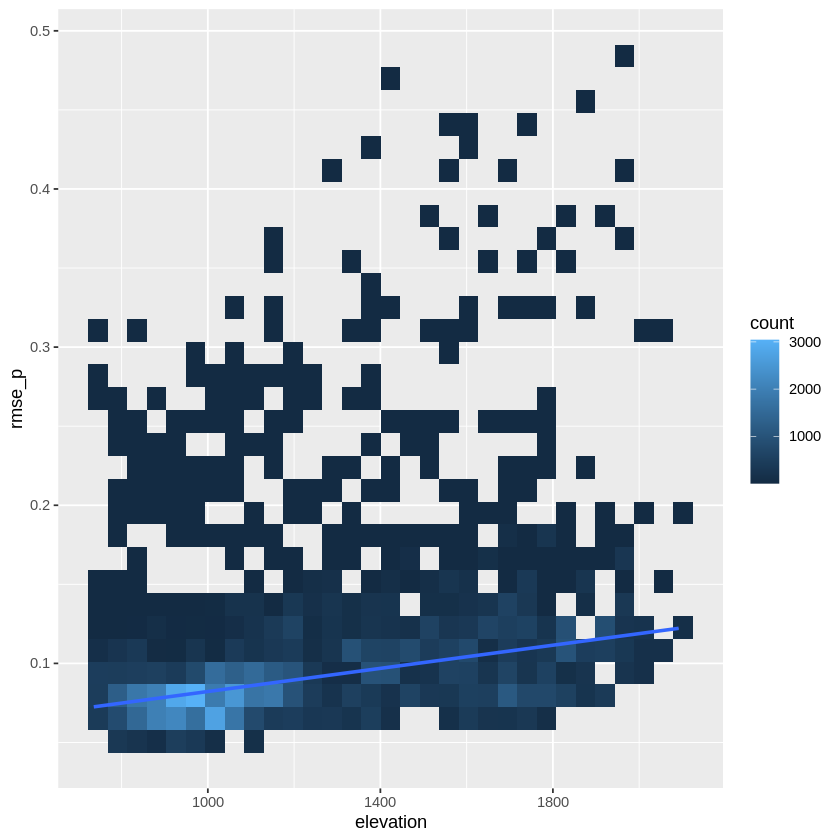

In [58]:
# cool_dt <- sim_c_sum_dt[,list(rmse_p = mean(sqrt(z^2))/SOC_Mg_Ha,rmse = mean(sqrt(z^2)),var_imp_elevation = mean(var_imp_elevation) ,geom=unique(geom)[1]),by = .(PLOT,id,trees,shrub_and_scrub,built,bare,aet,soil,vs,SRTM_mTPI,agbd_m,agbd_sd,elevation)]
# st_as_sf %>%
# st_write('review_output.gpkg',delete_dsn = T)
# cool_dt[,list(elev_r2= cor(elevation, rmse_p) ^ 2),by = .(PLOT)]
cool_dt[PLOT == 2473] %>%
ggplot(aes(x=elevation,y=rmse_p))+
# ylim(0,1)+
geom_bin2d() +
geom_smooth(method='lm')

In [96]:
sim_dt[,z:=(predicted-SOC_Mg_Ha)/SOC_Mg_Ha]

In [98]:
sim_dt[,residual_per:=(predicted-SOC_Mg_Ha)/SOC_Mg_Ha]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


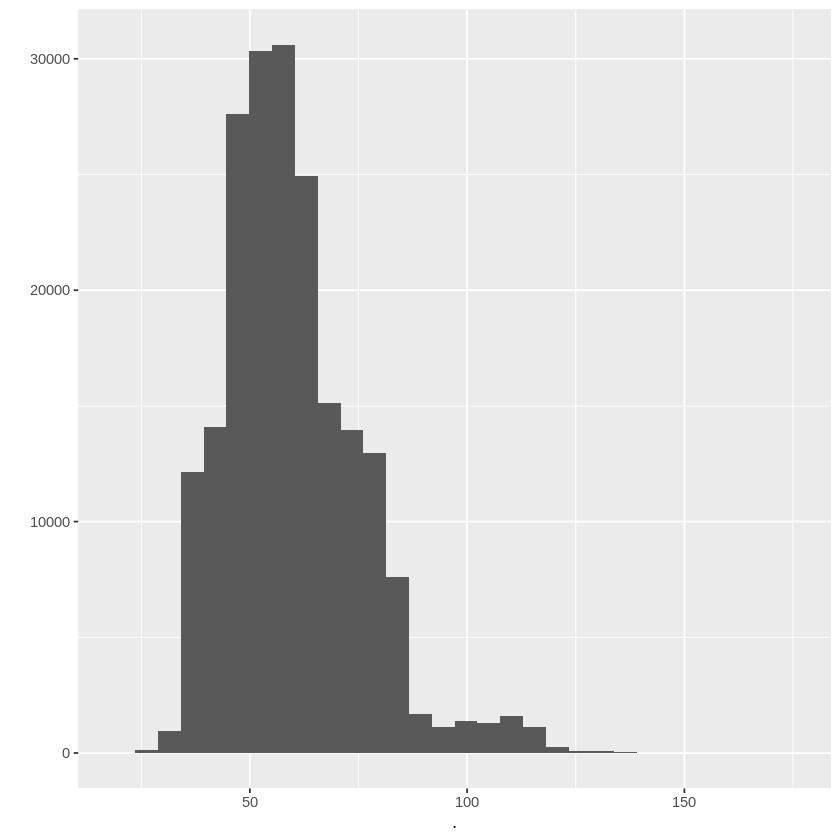

In [99]:
sim_dt[ z > -0.05 &z<0.05]$predicted %>% qplot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


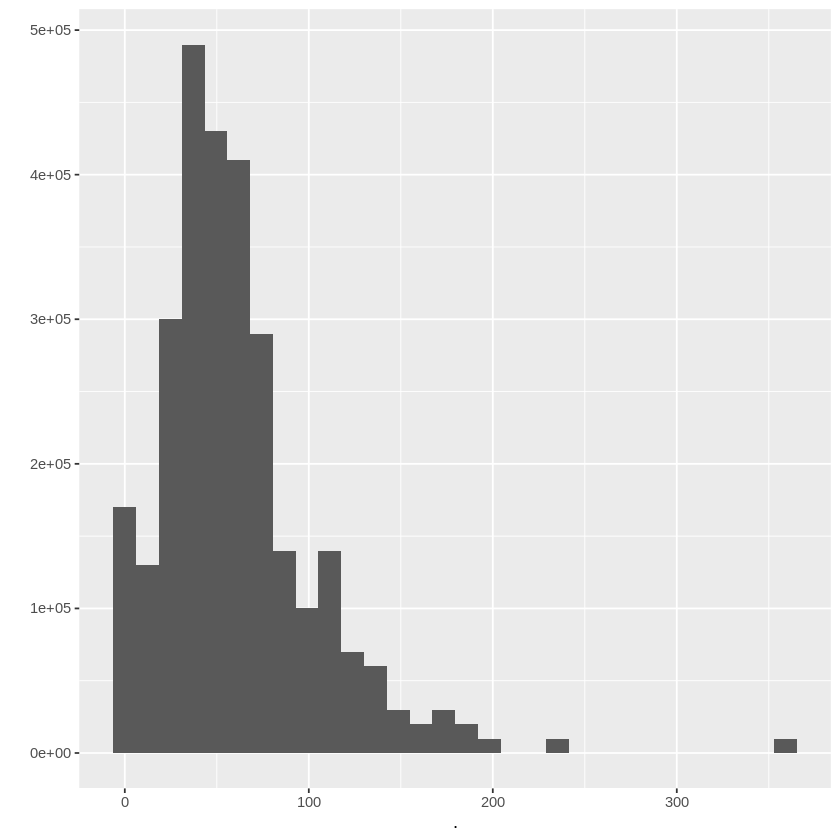

In [103]:
sim_dt$SOC_Mg_Ha %>% qplot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


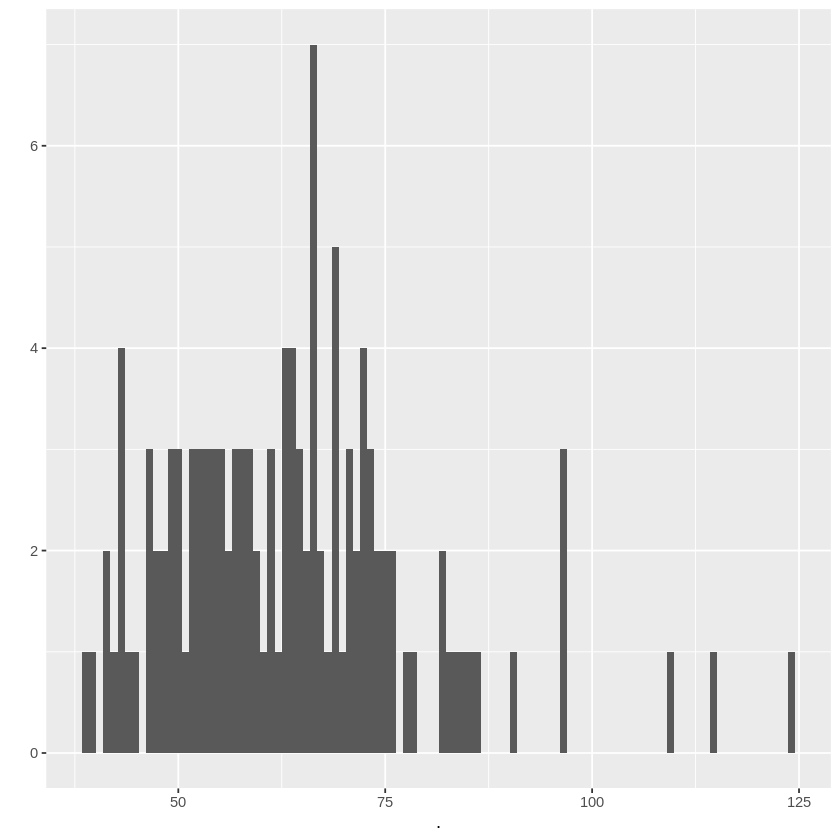

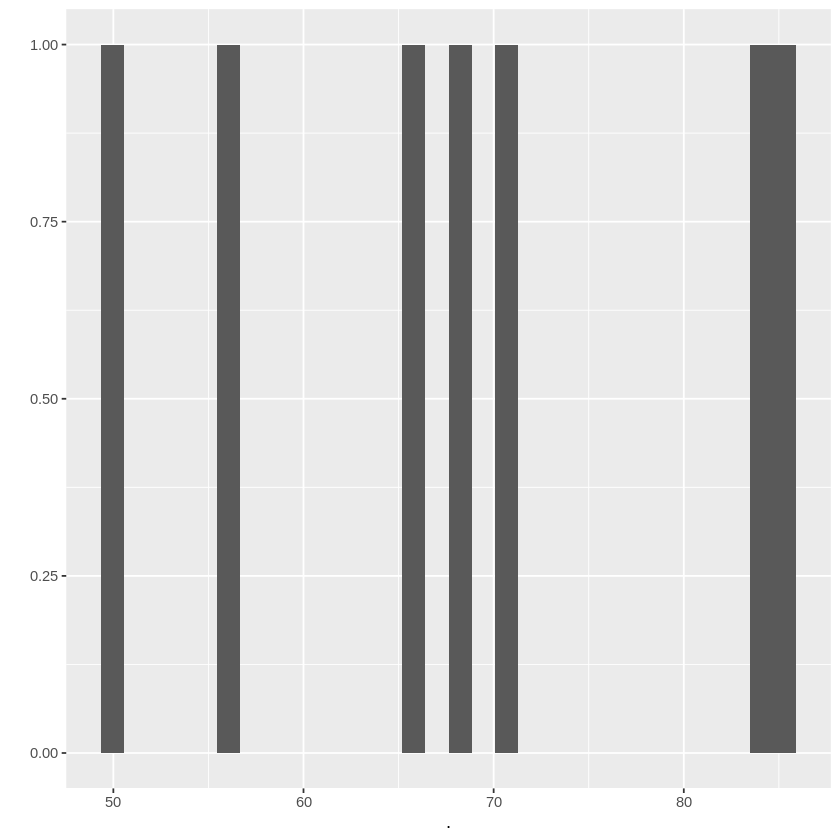

In [104]:
sim_dt[id==2831164]$predicted %>% qplot(bins=100)

sim_dt[id==2831164 & z > -0.05 &z<0.05]$predicted %>% qplot(geom='histogram')

In [105]:
sim_summary_dt <- sim_dt[,list(length = length(r2),length_05 = length(r2[sqrt((z)^2) <0.05]),geom=unique(geom)),by=.(id,PLOT)]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


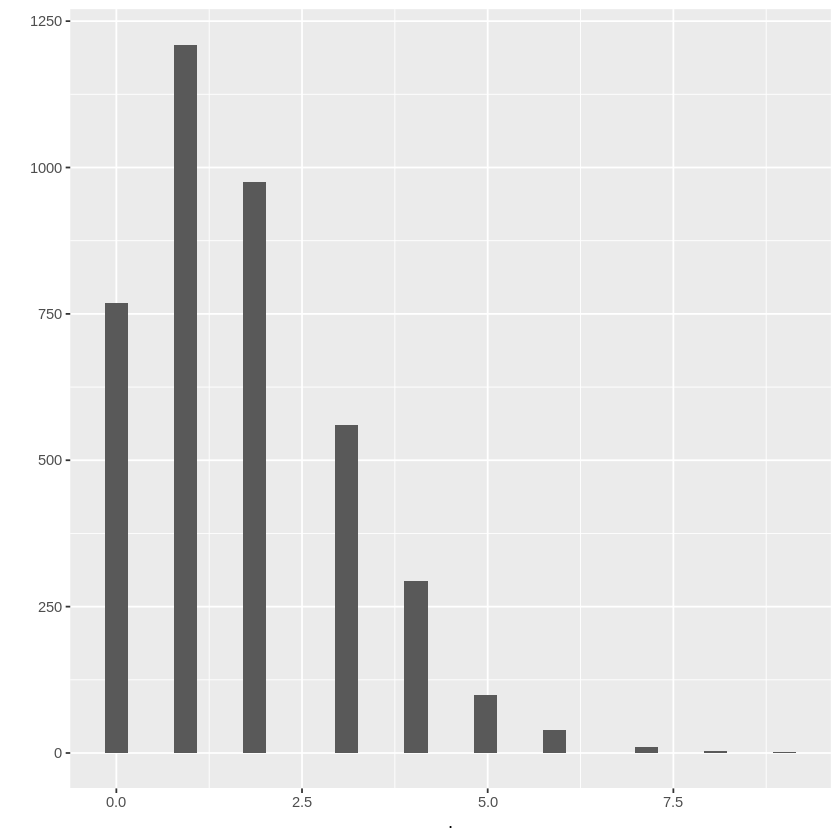

In [107]:
# sim_summary_dt
sim_summary_dt[PLOT==5289]$length_05 %>% qplot

In [26]:
sim_summary_dt %>% st_as_sf %>% st_write('sim_summary_id_plot.gpkg',delete_dsn = T)

writing: substituting ENGCRS["Undefined Cartesian SRS with unknown unit"] for missing CRS



Deleting source `sim_summary_id_plot.gpkg' failed
Writing layer `sim_summary_id_plot' to data source 
  `sim_summary_id_plot.gpkg' using driver `GPKG'
Writing 277039 features with 4 fields and geometry type Point.


In [27]:
(sim_dt %>% names)[c(9:18,20:37)]

[1] "water"              "trees"              "grass"             
 [4] "flooded_vegetation" "crops"              "shrub_and_scrub"   
 [7] "built"              "bare"               "snow_and_ice"      
[10] "elevation"          "SRTM_mTPI"          "aet"               
[13] "def"                "pdsi"               "pet"               
[16] "pr"                 "ro"                 "soil"              
[19] "srad"               "swe"                "tmmn"              
[22] "tmmx"               "vap"                "vpd"               
[25] "vs"                 "agbd_m"             "agbd_sd"           
[28] "agbd_n"

In [28]:
sim_dt$id %>% sample(1)
sim_dt[id==2762315]$PLOT %>% table

[1] 2826768

.
2672 2678 2702 4158 5059 5450 5553 
  86  120   60  209   64   82   89 

In [29]:
sim_dt[id==2762315] %>% nrow

[1] 710

In [30]:
#  sim_dt[id==2762315 &PLOT == 2678]$z %>% abs %>% qplot

In [31]:
sim_dt[id==2762315 &PLOT == 2678 ]$id %>% unique

[1] 2762315

In [32]:
names(sim_dt)

[1] "PLOT"                       "Stock_SOC_Mg_Ha"           
 [3] "county_name"                "id"                        
 [5] "left"                       "top"                       
 [7] "right"                      "bottom"                    
 [9] "water"                      "trees"                     
[11] "grass"                      "flooded_vegetation"        
[13] "crops"                      "shrub_and_scrub"           
[15] "built"                      "bare"                      
[17] "snow_and_ice"               "elevation"                 
[19] "landform"                   "SRTM_mTPI"                 
[21] "aet"                        "def"                       
[23] "pdsi"                       "pet"                       
[25] "pr"                         "ro"                        
[27] "soil"                       "srad"                      
[29] "swe"                        "tmmn"                      
[31] "tmmx"                       "vap"                       
[33] "vpd"                        "vs"                        
[35] "agbd_m"                     "agbd_sd"                   
[37] "agbd_n"                     "majorcomposition"          
[39] "age_years"                  "age_class"                 
[41] "predicted"                  "var_imp_water"             
[43] "var_imp_trees"              "var_imp_grass"             
[45] "var_imp_flooded_vegetation" "var_imp_crops"             
[47] "var_imp_shrub_and_scrub"    "var_imp_built"             
[49] "var_imp_bare"               "var_imp_snow_and_ice"      
[51] "var_imp_elevation"          "var_imp_landform"          
[53] "var_imp_SRTM_mTPI"          "var_imp_aet"               
[55] "var_imp_def"                "var_imp_pdsi"              
[57] "var_imp_pet"                "var_imp_pr"                
[59] "var_imp_ro"                 "var_imp_soil"              
[61] "var_imp_srad"               "var_imp_swe"               
[63] "var_imp_tmmn"               "var_imp_tmmx"              
[65] "var_imp_vap"                "var_imp_vpd"               
[67] "var_imp_vs"                 "var_imp_agbd_m"            
[69] "var_imp_agbd_sd"            "var_imp_agbd_n"            
[71] "var_imp_majorcomposition"   "var_imp_age_years"         
[73] "var_imp_age_class"          "r2"                        
[75] "geom"                       "z"                         
[77] "residual_per"

In [33]:
names(sim_dt)[c(9:18,20:37)]

[1] "water"              "trees"              "grass"             
 [4] "flooded_vegetation" "crops"              "shrub_and_scrub"   
 [7] "built"              "bare"               "snow_and_ice"      
[10] "elevation"          "SRTM_mTPI"          "aet"               
[13] "def"                "pdsi"               "pet"               
[16] "pr"                 "ro"                 "soil"              
[19] "srad"               "swe"                "tmmn"              
[22] "tmmx"               "vap"                "vpd"               
[25] "vs"                 "agbd_m"             "agbd_sd"           
[28] "agbd_n"

In [108]:
p_value_dt <-
sim_dt$PLOT %>% unique %>% lapply(function(y){
names(sim_dt)[c(9:18,20:37)] %>%
lapply(function(x){
which_dt <- sim_dt[ PLOT == y ][,list(good = length(z[z < 0.05])/length(z) <0.02),by= .(PLOT,id)]
good_x <- grid_dt[id %in% which_dt$id[which_dt$good]][[x]]
bad_x <- grid_dt[id %in% which_dt$id[!which_dt$good]][[x]]
if(length(good_x)>3 &length(bad_x)>3){
p_value <- wilcox.test(good_x,bad_x)$p.value

data.table(PLOT=y,variable=x,good = length(good_x),bad =length(bad_x),p_value=p_value) %>% return
}else(return(data.table(PLOT=y,variable=x,good = length(good_x),bad =length(bad_x),p_value=NA)))
}) %>% rbindlist %>% return}) %>% rbindlist

In [64]:
merge(fia_dt,good_bad_dt,by = 'PLOT') %>% st_as_sf %>% st_write('FIA_good_bad.gpkg')

Writing layer `FIA_good_bad' to data source `FIA_good_bad.gpkg' using driver `GPKG'
Writing 112 features with 110 fields and geometry type Point.


In [109]:
good_bad_dt <- p_value_dt[,list( mean(NA)),by=.(PLOT,good,bad)]

In [111]:
good_bad_dt <- merge(fia_dt,good_bad_dt,by = 'PLOT')

In [113]:
names(good_bad_dt)

[1] "PLOT"                           "INVYR"                         
  [3] "CN_loc"                         "STATECD_loc"                   
  [5] "COUNTYCD_loc"                   "SUBP_loc"                      
  [7] "INV_VST_NBR_loc"                "PLT_CN_loc"                    
  [9] "CYCLE_loc"                      "CONDID"                        
 [11] "CREATED_BY"                     "CREATED_DATE"                  
 [13] "CREATED_IN_INSTANCE"            "MODIFIED_BY"                   
 [15] "MODIFIED_DATE"                  "MODIFIED_IN_INSTANCE"          
 [17] "NOTES"                          "NOTES_OFFICE_loc"              
 [19] "SOILS_SAMPLE_METHOD_CD"         "SOILS_SAMPLE_STATUS_CD"        
 [21] "UNITCD"                         "USED_IN_ESTIMATION_CD"         
 [23] "VSTNBR_loc"                     "CN_lyr"                        
 [25] "STATECD_lyr"                    "COUNTYCD_lyr"                  
 [27] "SUBP_lyr"                       "INV_VST_NBR_lyr"               
 [29] "PLT_CN_lyr"                     "CYCLE_lyr"                     
 [31] "SUBCYCLE_lyr"                   "BULK_DENSITY"                  
 [33] "BULK_DENSITY_FINES"             "C_INORG_PCT"                   
 [35] "C_MG_AC"                        "C_TOTAL_PCT"                   
 [37] "COARSE_FRACTION_PCT"            "FIELD_SAMPLE_LBL"              
 [39] "LAYER_COLLECTED_CD"             "LAYER_THICKNESS"               
 [41] "LAYER_TYPE"                     "N_MG_AC"                       
 [43] "N_TOTAL_PCT"                    "SAMPLE_DIA"                    
 [45] "SAMPLER_TYPE"                   "SOIL_SAMP_PER_AC"              
 [47] "SSSL_CN"                        "VSTNBR_lyr"                    
 [49] "WT_FIELD_MOIST"                 "WT_OVEN_DRY"                   
 [51] "WT_ROCK"                        "CN"                            
 [53] "SRV_CN"                         "CTY_CN"                        
 [55] "MEASYEAR"                       "STATECD"                       
 [57] "COUNTYCD"                       "ISLAND_GRP"                    
 [59] "County.Name"                    "UNITCD_plot"                   
 [61] "PLOT_STATUS_CD"                 "CONGCD"                        
 [63] "DECLINATION"                    "DESIGNCD"                      
 [65] "ECOSUBCD"                       "ELEV"                          
 [67] "INTENSITY"                      "INVASIVE_SAMPLING_STATUS_CD"   
 [69] "INVASIVE_SPECIMEN_RULE_CD"      "KINDCD"                        
 [71] "MANUAL"                         "MEASMON"                       
 [73] "MEASDAY"                        "MICROPLOT_LOC"                 
 [75] "NF_SAMPLING_STATUS_CD"          "P2VEG_SAMPLING_STATUS_CD"      
 [77] "P2VEG_SAMPLING_LEVEL_DETAIL_CD" "PRECIPITATION"                 
 [79] "QA_STATUS"                      "RDDISTCD"                      
 [81] "SAMP_METHOD_CD"                 "SUBP_EXAMINE_CD"               
 [83] "WATERCD"                        "CYCLE"                         
 [85] "SUBCYCLE"                       "P2PANEL"                       
 [87] "SUBPANEL"                       "PREV_PLT_CN"                   
 [89] "Island"                         "RGN_FLG"                       
 [91] "NOTES_plot"                     "NOTES_OFFICE"                  
 [93] "GEOGRAPHIC_AREA"                "TOPO_POSITION_PNW"             
 [95] "REMPER"                         "NBP_CN"                        
 [97] "CONSERVATION_ZONE"              "Sum_C_TOTAL_PCT"               
 [99] "NOTES_FLAG"                     "SOC_Mg_Ac"                     
[101] "SOC_Mg_Ha"                      "Sum_SOC_Mg_Ha"                 
[103] "Lower_Depth"                    "Upper_Depth"                   
[105] "Min_Upper_Depth"                "Max_Lower_Depth"               
[107] "Stock_SOC_Mg_Ha"                "geometry"                      
[109] "good"                           "bad"                           
[111] "V1"

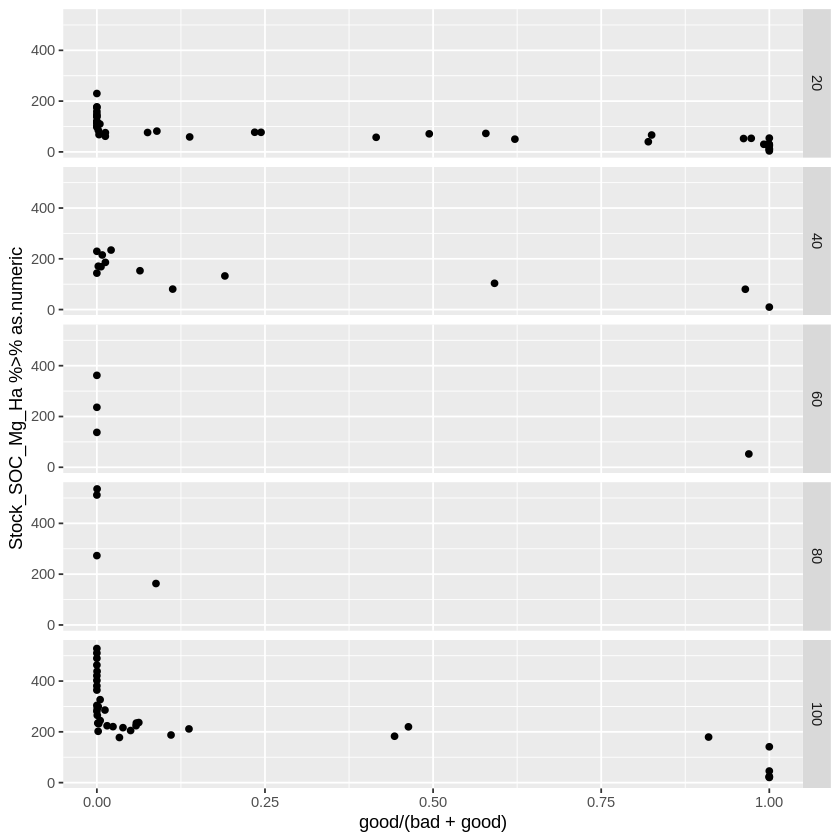

In [114]:
good_bad_dt %>%
  ggplot(aes(x=good/(bad +good),y=Stock_SOC_Mg_Ha %>% as.numeric))+
  geom_point() +
  facet_grid(Max_Lower_Depth %>% as.numeric~.)

In [164]:
# x <- sim_dt[ PLOT == 2409 ][,list()]

z <- sim_dt[ PLOT == 2409 ]$z
length(x[abs(z) < 0.05])
length(x[abs(z) >= 0.05])
wilcox.test(sample(x[abs(z) < 0.05],500,replace=T) %>% sort ,
          sample(x[abs(z) >= 0.05],500,replace=T)%>% sort)

[1] 49

[1] 9951


	Wilcoxon rank sum test with continuity correction

data:  sample(x[abs(z) < 0.05], 500, replace = T) %>% sort and sample(x[abs(z) >= 0.05], 500, replace = T) %>% sort
W = 130044, p-value = 0.2693
alternative hypothesis: true location shift is not equal to 0


In [121]:
x <- sim_dt[ PLOT == 2409 ]$elevation
z <- sim_dt[ PLOT == 2409 ]$z
t.test(x[abs(z) < 0.05],
          x[abs(z) >= 0.05])


	Welch Two Sample t-test

data:  x[abs(z) < 0.05] and x[abs(z) >= 0.05]
t = 0.83328, df = 48.489, p-value = 0.4088
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -55.68776 134.54889
sample estimates:
mean of x mean of y 
 1326.269  1286.839 


In [ ]:
#  sim_dt[ PLOT == 2409 ] %>%
 data.table(elevation = c(sample(x[abs(z) < 0.05],1000000,replace=T),sample(x[abs(z) >= 0.05],1000000,replace=T)),z = c(rep(0,1000),rep(1,1000))) %>%
   ggplot(aes(x=elevation,group = abs(z) <0.05))+
     geom_density(aes(color= abs(z) <0.05))

In [129]:


if(length(x[abs(z) < 0.05])>3 &length(x[abs(z) >= 0.05])>3 ){
  t.test(x[abs(z) < 0.05],
          x[abs(z) >= 0.05])$p.value
          }else(return(NA))

[1] 0.408775

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


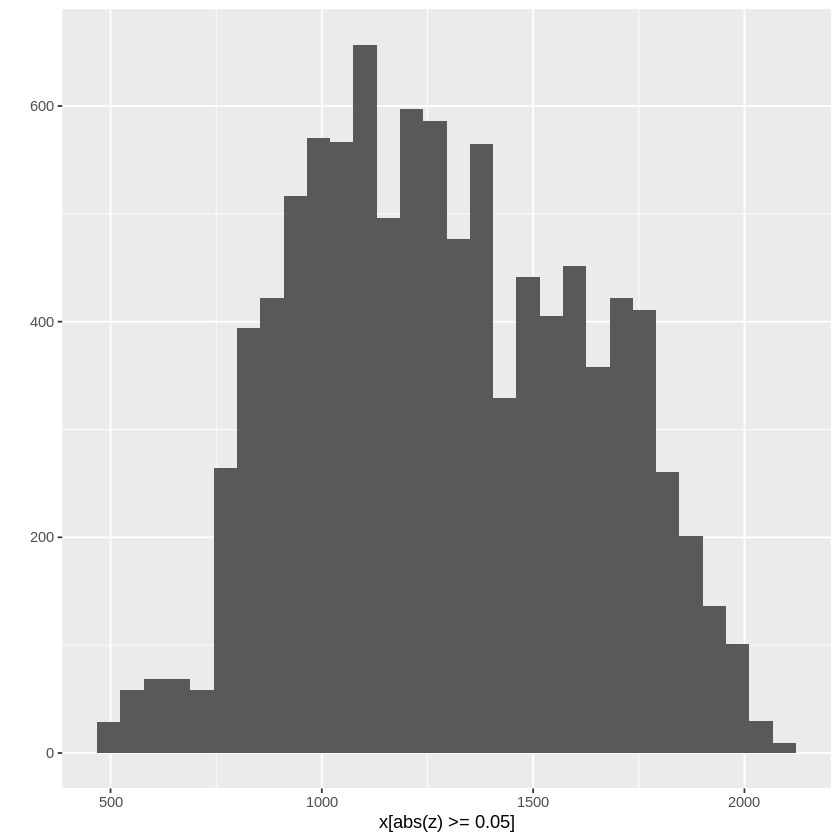

In [131]:
qplot(x[abs(z) >= 0.05])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


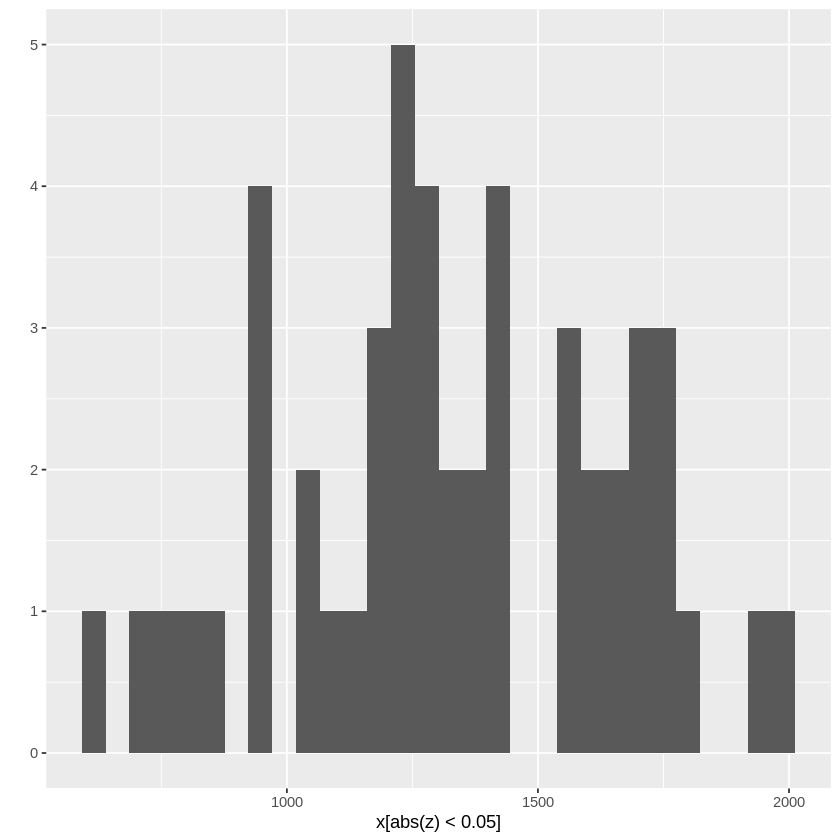

In [130]:
qplot(x[abs(z) < 0.05])

In [240]:
sim_dt[, good := length(z[abs(z) < 0.2])/length(z) > .50,by= .(PLOT,id,DEPTH_UPPER,DEPTH_LOWER)]

In [241]:
sim_dt$good %>% table / nrow(sim_dt)

.
    FALSE      TRUE 
0.7499318 0.2500682 

In [245]:
sim_dt[,list(length=sum(good)),by= .(PLOT ,DEPTH_UPPER,DEPTH_LOWER)]

PLOT,DEPTH_UPPER,DEPTH_LOWER,length
<chr>,<dbl>,<dbl>,<int>
2159,0,20,1
2159,20,40,0
2159,40,60,0
2159,60,80,6587
2159,80,100,93
2167,0,20,7316
2167,20,40,2353
2167,40,60,11
2167,60,80,0


In [128]:
names(sim_dt)[c(11:20,22:39)]

[1] "water"              "trees"              "grass"             
 [4] "flooded_vegetation" "crops"              "shrub_and_scrub"   
 [7] "built"              "bare"               "snow_and_ice"      
[10] "elevation"          "SRTM_mTPI"          "aet"               
[13] "def"                "pdsi"               "pet"               
[16] "pr"                 "ro"                 "soil"              
[19] "srad"               "swe"                "tmmn"              
[22] "tmmx"               "vap"                "vpd"               
[25] "vs"                 "agbd_m"             "agbd_sd"           
[28] "agbd_n"

In [247]:
 var_imp_dt<- sim_dt[id %>% unique %>% length >60][
  , .(p_value = lapply(.SD, function(x) {
    if((length(x[good])>30 &length(x[!good])>30 ) & (mean(x[good])!=mean(x[!good]))){


      # wilcox.test(good_x,bad_x)
      1:10 %>% lapply(function(z){
      wilcox.test(sample(x[good],length(x[good]),replace=T) %>% sort ,
          sample(x[!good],length(x[good]),replace=T)%>% sort)$p.value
      }) %>% unlist %>% mean
      # wilcox.test(x[good],
      #        x[!good])$p.value

             }else(return(NA))

    }) ,
      variable = names(sim_dt)[c(11:20,22:39)])
  , by = .( PLOT,DEPTH_UPPER,DEPTH_LOWER)
  , .SDcols = c(c(11:20,22:39))
]

var_imp_dt$p_value <- var_imp_dt$p_value %>% unlist

Warning message in wilcox.test.default(sample(x[good], length(x[good]), replace = T) %>% :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(sample(x[good], length(x[good]), replace = T) %>% :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(sample(x[good], length(x[good]), replace = T) %>% :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(sample(x[good], length(x[good]), replace = T) %>% :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(sample(x[good], length(x[good]), replace = T) %>% :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(sample(x[good], length(x[good]), replace = T) %>% :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(sample(x[good], length(x[good]), replace = T) %>% :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(sample(x[good], length(x[good]), repl

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 3094 rows containing non-finite values (`stat_bin()`).”


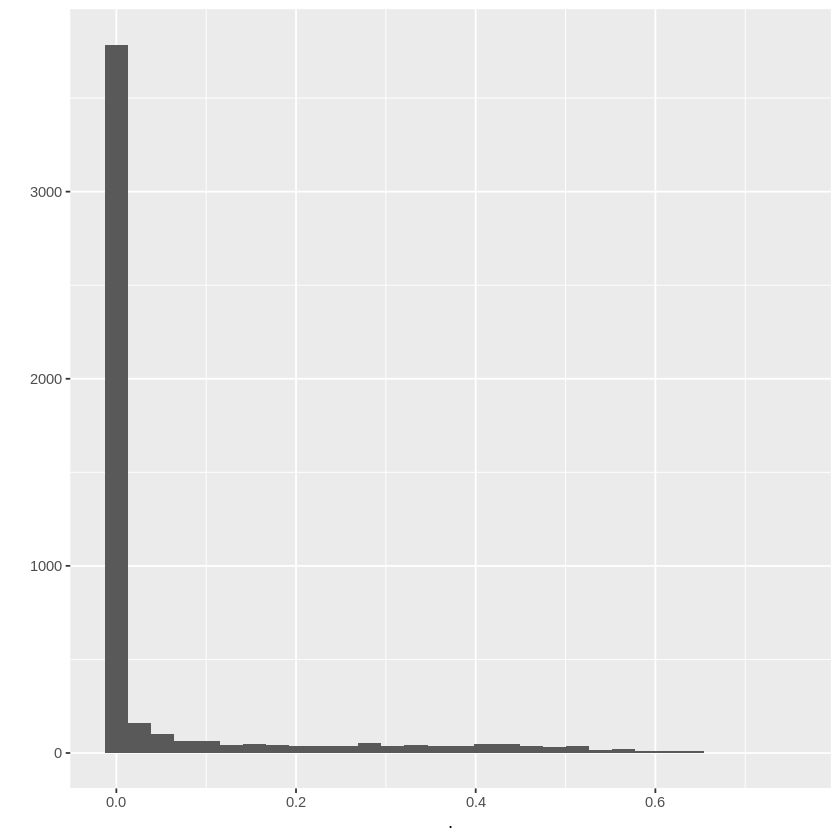

In [248]:
var_imp_dt$p_value%>%qplot

In [277]:
# grid_dt

In [286]:
# out_dt <- data.table(var_imp_dt,sim_summary_dt[match(var_imp_dt$id,sim_summary_dt$id)])
out_dt <- data.table(p_value_dt,fia_dt[,c('geometry')][match(p_value_dt$PLOT,fia_dt$PLOT)])

In [287]:
out_dt[,bonferroni:=p_value*length(c(9:18,20:37))]

In [288]:
out_dt$p_value <- out_dt$p_value %>% unlist

In [289]:
# out_dt$geom <- NULL
out_dt

PLOT,variable,good,bad,p_value,geometry,bonferroni
<chr>,<chr>,<int>,<int>,<dbl>,<POINT [°]>,<dbl>
2159,right,0,1448,NA,POINT (-155.7952 20.1789),NA
2159,bottom,0,1448,NA,POINT (-155.7952 20.1789),NA
2159,water,0,1448,NA,POINT (-155.7952 20.1789),NA
2159,trees,0,1448,NA,POINT (-155.7952 20.1789),NA
2159,grass,0,1448,NA,POINT (-155.7952 20.1789),NA
2159,flooded_vegetation,0,1448,NA,POINT (-155.7952 20.1789),NA
2159,crops,0,1448,NA,POINT (-155.7952 20.1789),NA
2159,shrub_and_scrub,0,1448,NA,POINT (-155.7952 20.1789),NA
2159,built,0,1448,NA,POINT (-155.7952 20.1789),NA


In [ ]:
# short_out_dt[!is.na(var_imp_aet),]

In [290]:
short_out_dt <- dcast(out_dt,  PLOT ~ variable,value.var='bonferroni', drop=FALSE)
# short_out_dt <-short_out_dt[!is.na(trees),]

In [291]:
short_out_dt

PLOT,SRTM_mTPI,aet,agbd_m,bare,bottom,built,crops,def,elevation,⋯,soil,srad,swe,tmmn,tmmx,trees,vap,vpd,vs,water
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2159,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2167,1.421047e+00,1.289769e+01,9.204547e+00,3.119122e-02,1.014642e+00,3.373460960,6.354779e-01,3.728379e-01,3.286284e-01,⋯,2.576866e-01,1.666183e-01,NaN,5.372907e-01,1.479288e+00,1.222115e+01,1.367668e+00,7.309191e-01,5.723218e-02,4.570005e+00
2204,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2208,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2212,7.018764e+00,1.888778e+00,2.084539e-06,5.683336e-05,7.951500e-02,0.028236945,4.887407e-07,1.016842e-04,2.376346e-01,⋯,6.650145e-07,8.771910e-05,NaN,1.174909e+00,4.714086e-01,4.468899e+00,5.954767e-01,1.178625e+00,4.937006e+00,9.832171e+00
2230,1.579294e+01,1.168861e+01,4.852241e-01,2.003061e+00,2.450268e+01,26.824973545,8.392879e+00,1.199284e+01,1.444832e+00,⋯,1.098635e+01,1.567564e+01,NaN,2.114277e+00,8.099399e-01,6.333043e+00,8.409444e-01,2.493525e+00,5.329259e+00,1.970867e+01
2237,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2242,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2256,3.244281e-03,3.955178e-26,1.364725e-33,1.689885e-23,1.961589e-119,6.579394777,5.264297e-85,1.181937e-74,1.215618e-91,⋯,5.457420e-84,1.630242e-12,NaN,4.029182e-89,1.044699e-88,8.172272e-40,2.331827e-88,2.265006e-89,5.392972e-99,1.799437e-02


In [292]:
good_set <- out_dt[,list(bonferroni_20 = mean(bonferroni[bonferroni<.2],na.rm=T),n=length(bonferroni[bonferroni<.2])),by = .(PLOT,variable)][!is.na(bonferroni_20)]$PLOT %>% unique

In [293]:
good_set %>% length

[1] 44

In [294]:
fia_dt[PLOT %in% good_set]$Stock_SOC_Mg_Ha %>% mean(na.rm=T)

[1] 147.8602

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”


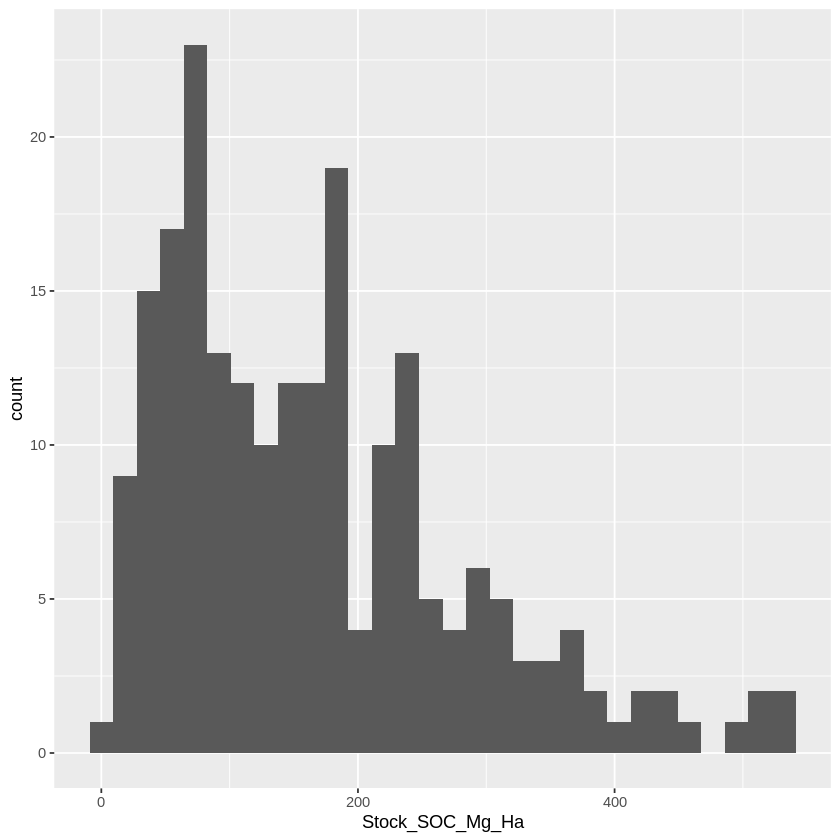

In [295]:
fia_dt %>%
  ggplot(aes(x=Stock_SOC_Mg_Ha))+
  geom_histogram()

In [297]:
short_out_dt <- data.table(short_out_dt,fia_dt[,c('geometry')][match(short_out_dt$PLOT,fia_dt$PLOT)])

In [298]:
short_out_dt %>% st_as_sf %>% st_write('bonferroni_adj.gpkg',delete_dsn = T)

Deleting source `bonferroni_adj.gpkg' using driver `GPKG'
Writing layer `bonferroni_adj' to data source 
  `bonferroni_adj.gpkg' using driver `GPKG'
Writing 101 features with 29 fields and geometry type Point.


In [ ]:
cols_to_consider <- names(short_out_dt)[]


# Assuming 'short_out_dt' is your data.table
# Define the columns you want to consider for finding the max value by their indices
cols_to_consider_indices <- 3:(ncol(short_out_dt)-1) # Replace with actual indices of Var3, Var5, Var7
short_out_dt$max_col <-
1:nrow(short_out_dt) %>% lapply(function(x){
if(is.na(short_out_dt[x,cols_to_consider_indices,with=F] %>% unlist) %>% all){return(NA)}
short_out_dt[x,cols_to_consider_indices,with=F] %>% unlist %>% which.min( ) %>% names}) %>% unlist

In [ ]:
short_out_dt %>% st_write('max_col_p.gpkg')

In [ ]:
short_out_dt

In [ ]:
short_out_dt %>%
  ggplot(aes(x=1:nrow(short_out_dt),y=soil))+
  geom_line()

In [ ]:
out_dt[bonferroni <= .05]$variable %>% table

In [ ]:
out_dt[bonferroni<= 0.1] %>%
  ggplot(aes(x= variable %>% factor))+
  geom_bar()
  # geom_smooth(method='lm')

In [ ]:
data.table(out_dt) %>% st_as_sf() %>% st_write('/content/plot_sig_variables.gpkg',delete_dsn=T)

In [ ]:
# sim_dt[id ==2222069  ]
# 1850844
# sqrt(((Stock_SOC_Mg_Ha-predicted)/Stock_SOC_Mg_Ha)^2)<0.05
sim_dt[id ==2952969  & sqrt(((Stock_SOC_Mg_Ha-predicted)/Stock_SOC_Mg_Ha)^2)<0.05] %>%
  ggplot(aes(x=Stock_SOC_Mg_Ha)) +
  geom_histogram()
  # print()

In [ ]:
sim_dt %>%
  ggplot(aes(y=Stock_SOC_Mg_Ha,x=r2))+
    geom_bin2d()
    # geom_smooth()

In [ ]:
# Load the necessary library
library(repr)

# Adjust width and height of plots
options(repr.plot.width=20, repr.plot.height=8)